<a href="https://colab.research.google.com/github/NevineSaid/Pattern-recognition-sheet1/blob/master/FaceRecognition_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob, os
import numpy as np
import cv2
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Download the dataset and understand the format:
The dataset consists of .pgm grayscale images. We can read them using cv2.imread() as per the code below

In [0]:
faces=[]
unrolled_faces=[]
labels= []

print(os.getcwd()) 
dire="/content/drive/My Drive/Colab Notebooks/orl_faces"

i=0
for folder in os.listdir(dire):
    face_dir=os.path.join(dire,folder) 
    labels.append(folder)

    os.chdir(face_dir)
    for face in os.listdir(face_dir):
        fc=os.path.join(face_dir,face)
        faces.append(cv2.imread(fc,0))
         
        unrolled_faces.append(np.array(cv2.imread(fc,0)).flatten())

/content


# Generate the Data Matrix and the Label vector
We have unrolled the faces into one data matrix of size 400 x 10304 where each row represents an instance (image) and each column represents the dimesion.

In [0]:
data_mat =np.array(unrolled_faces)
labels = np.array(labels)

print(data_mat.shape)
print(labels)

# face1  = data_mat[0].r
# plt.imshow(face1, cmap='gray')
# plt.figure()
# print(labels[0])

(400, 10304)
['s16' 's12' 's14' 's1' 's10' 's11' 's13' 's15' 's17' 's18' 's24' 's27'
 's20' 's25' 's23' 's19' 's26' 's22' 's21' 's2' 's31' 's36' 's33' 's29'
 's28' 's35' 's34' 's3' 's32' 's30' 's8' 's4' 's38' 's9' 's37' 's7' 's6'
 's39' 's40' 's5']


# Split the Dataset into Training and Test sets

In [0]:
test = data_mat[::2] 
train = data_mat[1::2]

new_train_labels = np.array([])

for lbl in labels:
  for i in range(0,5):
    new_train_labels = np.append(new_train_labels,lbl)
    
    


print(train.shape) #train labels same as test labels
print(new_train_labels.shape)


(200, 10304)
(200,)


# Classification using PCA

In [0]:
#PCA

#calculate mean on dimensions
mean = np.mean(train,axis = 0) 

#center the train and test data
train_centered = train - mean
test_centered= test -np.mean(test, axis = 0)

#calculate covariance matrix
cov = np.cov(train_centered.T, bias = True) # shape (10304,10304)

print(mean)
print(cov.shape)




[85.125 84.9   85.53  ... 74.05  74.865 74.055]
(10304, 10304)


In [0]:
#calculate eigenvalues and eigenvectors from covariance matrix
values, vectors = np.linalg.eigh(cov)

print('values',values)
print('vectors',vectors)
print('vectors shape: ',vectors.shape)

#sum of all lamdas
sum = 0
for lamda in values:
  sum+= lamda
  
print('sum of all lamdas is: ',sum)

#sort eigenvalues and vectors descendingly
idx = values.argsort()[::-1]
values = values[idx]
vectors = vectors[:,idx]


values [-1.92048673e-09 -1.61321426e-09 -1.13285423e-09 ...  1.10812794e+06
  2.06864404e+06  2.73345260e+06]
vectors [[ 0.          0.          0.         ...  0.01627512  0.01550831
  -0.00139244]
 [ 0.57051435  0.05076318 -0.01156647 ...  0.01671146  0.01553177
  -0.00150413]
 [-0.3174489  -0.42827703 -0.05316387 ...  0.01651685  0.01536263
  -0.00160288]
 ...
 [-0.01112249 -0.00572374  0.00246344 ...  0.01698592 -0.00904779
  -0.00609443]
 [-0.0197024  -0.01371974 -0.01177227 ...  0.0170132  -0.00926794
  -0.00651402]
 [-0.01403722  0.00788643 -0.00995663 ...  0.01737217 -0.00800858
  -0.00701662]]
vectors shape:  (10304, 10304)
sum of all lamdas is:  15733950.00342499


In [0]:
# eigen_face1  = vectors[:,1].reshape(112,92)
# plt.imshow(eigen_face1, cmap='gray')
# plt.figure()

In [0]:
# Calculating the projection matrix based on different values of alpha and projecting the train and test sets separately
sum_r=0
i=0
alpha = np.array([0.8,0.85,0.9,0.95])
for value in alpha:
    for lamda in values:
        if((sum_r/ sum )< value):
            sum_r += lamda
            i+=1

    print('number of dimensions when alpha =  ',value,'is: ',i+1)
    if(value == 0.8):
      new_basis_08 =vectors[:,0:i+1]
      projected_data_08 = np.dot(new_basis_08.T , train_centered.T)
      test_data_08 = np.dot(new_basis_08.T , test_centered.T)

      
    elif (value == 0.85):
      new_basis_085 =vectors[:,0:i+1]
      projected_data_085 =np.dot( new_basis_085.T ,train_centered.T)
      test_data_085 = np.dot(new_basis_085.T , test_centered.T)

      
    elif(value == 0.9):
      new_basis_09 =vectors[:,0:i+1]
      projected_data_09 = np.dot(new_basis_09.T , train_centered.T)
      test_data_09 = np.dot(new_basis_09.T , test_centered.T)

      
    elif(value == 0.95):
      new_basis_095 =vectors[:,0:i+1]
      projected_data_095 = np.dot(new_basis_095.T , train_centered.T)
      test_data_095 = np.dot(new_basis_095.T , test_centered.T)
      
    sum_r=0
    i=0  


number of dimensions when alpha =   0.8 is:  37
number of dimensions when alpha =   0.85 is:  52
number of dimensions when alpha =   0.9 is:  76
number of dimensions when alpha =   0.95 is:  116


Accuracy values for alpha = 0.8, 0.85, 0.9, 0.95 consecutively:  [0.925, 0.925, 0.94, 0.94]


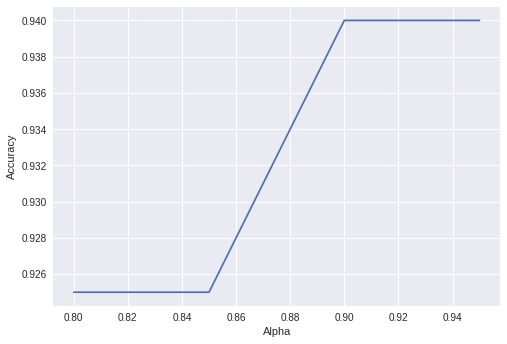

In [0]:
#KNN Classifier
#Report Accuracy for every value of alpha separately.
projected_data = [projected_data_08.T,projected_data_085.T,projected_data_09.T,projected_data_095.T]
test_data = [test_data_08.T, test_data_085.T, test_data_09.T, test_data_095.T]
acc= []

clf = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')

i=0
for d in projected_data:
  clf.fit(d, new_train_labels)
  output_labels = clf.predict(test_data[i])
  acc.append(accuracy_score(output_labels,new_train_labels))
  i+=1
  
print('Accuracy values for alpha = 0.8, 0.85, 0.9, 0.95 consecutively: ', acc)
  
#plot alpha against accuracy
plt.plot(alpha, acc)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

#accuracy increases as alpha increases

#### Can you find a relation between alpha and the classification accuracy?
Yes, accuracy increases as alpha increases.

For alpha =  0.8


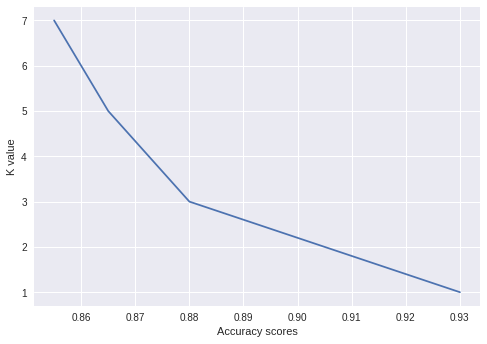

[0.93, 0.8800000000000001, 0.8649999999999999, 0.8550000000000001]
For alpha =  0.85


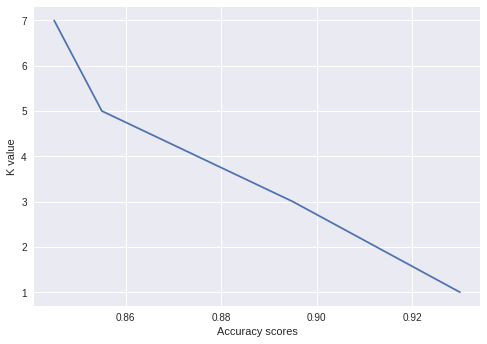

[0.93, 0.8949999999999999, 0.8550000000000001, 0.8450000000000001]
For alpha =  0.9


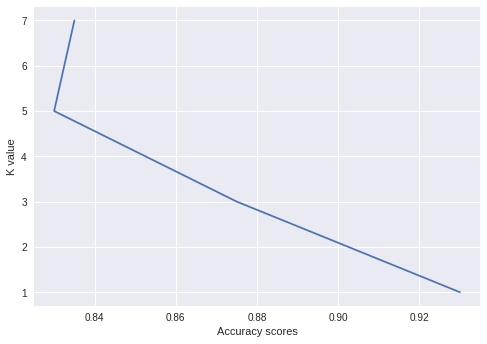

[0.93, 0.875, 0.8299999999999998, 0.8350000000000002]
For alpha =  0.95


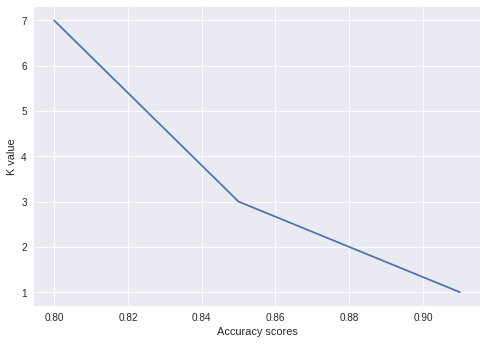

[0.9099999999999999, 0.85, 0.825, 0.8]
[0.93, 0.8800000000000001, 0.8649999999999999, 0.8550000000000001, 0.93, 0.8949999999999999, 0.8550000000000001, 0.8450000000000001, 0.93, 0.875, 0.8299999999999998, 0.8350000000000002, 0.9099999999999999, 0.85, 0.825, 0.8]


In [0]:
# Set the number of neighbors in the K-NN classifier to 1,3,5,7.
neighbors = list(range(1,8,2))
cv_scores = []
#tuning
for p in projected_data:
  for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance') #tie breaks according to distance

    scores = cross_val_score(knn, p, new_train_labels, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
        
#Plot (or tabulate) the performance measure (accuracy) against the K value.
i=0
for a in alpha:
  print('For alpha = ', a)
  plt.plot(cv_scores[i:i+4], neighbors)
  plt.xlabel('Accuracy scores')
  plt.ylabel('K value')
  plt.show()
  print(cv_scores[i:i+4])
  i+=4
print(cv_scores)


# Bonus
### Use different Training and Test splits. Change the number of instances per subject to be 7 and keep 3 instances per subject for testing.

In [0]:
#**************split 70% 30% for bonus**********************
bonus_train =[]
bonus_test = []
bonus_lables_train =[]
bonus_lables_test =[]

bonus_labels = np.array([])

for lbl in labels:
  for i in range(0,10):
    bonus_labels = np.append(bonus_labels,lbl)

    
print(bonus_train_labels)
for i in range(0,400,10):
  for j in range(10):
    if j < 7:
      bonus_train.append(data_mat[j])
      bonus_lables_train.append(bonus_labels[j])
    else:
      bonus_test.append(data_mat[j])
      bonus_lables_test.append(bonus_labels[j])
  
bonus_train_data = np.asarray(bonus_train)
bonus_test_data = np.asarray(bonus_test)
bonus_train_lbl = np.asarray(bonus_lables_train)
bonus_test_lbl =  np.asarray(bonus_lables_test)

print(bonus_train_data.shape)
print(bonus_test_data.shape)
print(bonus_train_lbl.shape)
print(bonus_test_lbl.shape)

#PCA

#calculate mean on dimensions
mean = np.mean(bonus_train_data,axis = 0) 

#center the train and test data
train_centered = bonus_train_data - mean
test_centered= bonus_test_data -np.mean(bonus_test_data, axis = 0)

#calculate covariance matrix
cov = np.cov(train_centered.T, bias = True) # shape (10304,10304)

print(cov.shape)

#calculate eigenvalues and eigenvectors from covariance matrix
values, vectors = np.linalg.eigh(cov)

print('values',values)
print('vectors',vectors)
print('vectors shape: ',vectors.shape)

#sum of all lamdas
sum = 0
for lamda in values:
  sum+= lamda
  
print('sum of all lamdas is: ',sum)

#sort eigenvalues and vectors descendingly
idx = values.argsort()[::-1]
values = values[idx]
vectors = vectors[:,idx]

# Calculating the projection matrix based on different values of alpha and projecting the train and test sets separately
sum_r=0
i=0
alpha = np.array([0.8,0.85,0.9,0.95])
for value in alpha:
    for lamda in values:
        if((sum_r/ sum )< value):
            sum_r += lamda
            i+=1

    print('number of dimensions when alpha =  ',value,'is: ',i+1)
    if(value == 0.8):
      new_basis_08 =vectors[:,0:i+1]
      projected_data_08 = np.dot(new_basis_08.T , train_centered.T)
      test_data_08 = np.dot(new_basis_08.T , test_centered.T)

      
    elif (value == 0.85):
      new_basis_085 =vectors[:,0:i+1]
      projected_data_085 =np.dot( new_basis_085.T ,train_centered.T)
      test_data_085 = np.dot(new_basis_085.T , test_centered.T)

      
    elif(value == 0.9):
      new_basis_09 =vectors[:,0:i+1]
      projected_data_09 = np.dot(new_basis_09.T , train_centered.T)
      test_data_09 = np.dot(new_basis_09.T , test_centered.T)

      
    elif(value == 0.95):
      new_basis_095 =vectors[:,0:i+1]
      projected_data_095 = np.dot(new_basis_095.T , train_centered.T)
      test_data_095 = np.dot(new_basis_095.T , test_centered.T)
      
    sum_r=0
    i=0  

#KNN Classifier
#Report Accuracy for every value of alpha separately.
projected_data = [projected_data_08.T,projected_data_085.T,projected_data_09.T,projected_data_095.T]
test_data = [test_data_08.T, test_data_085.T, test_data_09.T, test_data_095.T]
acc= []

clf = KNeighborsClassifier(n_neighbors = 1)

i=0
for d in projected_data:
  clf.fit(d, bonus_train_lbl)
  output_labels = clf.predict(test_data[i])
  acc.append(accuracy_score(output_labels,bonus_test_lbl))
  i+=1
  
print('Accuracy values for alpha = 0.8, 0.85, 0.9, 0.95 consecutively: ', acc)
  

#accuracy increases as alpha increases


[]
(280, 10304)
(120, 10304)
(280,)
(120,)
(10304, 10304)
values [-5.58412374e-09 -5.32727438e-09 -4.46146597e-09 ...  1.45061928e+06
  2.32348170e+06  4.63412128e+06]
vectors [[-8.05748732e-04  8.64614793e-04  1.66992755e-03 ...  1.38633219e-03
   5.81328826e-03 -2.42186965e-03]
 [ 4.03228525e-01 -1.88569820e-01 -4.29724375e-01 ...  2.07176305e-03
   5.58092219e-03 -3.40969659e-03]
 [-2.13898294e-01 -4.11770053e-01 -2.99109437e-02 ...  8.79890996e-04
   5.28759032e-03 -2.90848433e-03]
 ...
 [ 1.73077232e-03  2.97387855e-03 -2.30105778e-03 ... -7.24652606e-04
   6.20479775e-03 -9.21151668e-03]
 [-9.02757202e-03  5.02844250e-03  1.31340621e-04 ... -1.31092916e-03
   6.58230249e-03 -8.89916710e-03]
 [ 2.24252777e-03 -2.98704326e-03 -1.86470680e-03 ...  6.03502800e-04
   3.88536144e-03 -5.72602058e-03]]
vectors shape:  (10304, 10304)
sum of all lamdas is:  10630079.306122426
number of dimensions when alpha =   0.8 is:  5
number of dimensions when alpha =   0.85 is:  5
number of dimensions

In [0]:
imgs=[]
unrolled_imgs=[]
labels_imgs= []

dire="/content/drive/My Drive/Colab Notebooks/rand_imgs_pgm"

i=0
for folder in os.listdir(dire):
    img_dir=os.path.join(dire,folder) 
    labels_imgs.append(folder)
    imgs.append(cv2.imread(img_dir,0))
    unrolled_imgs.append(np.array(cv2.imread(img_dir,0)).flatten())
    
    
    
# print(unrolled_imgs)
img_mat =np.array(unrolled_imgs)
print(img_mat.shape)
# print(labels_imgs)

#calculate mean on dimensions
bonus_mean = np.mean(data_mat,axis = 0) 

#center the train and test data
data_centered = train - bonus_mean

projected_data_bonus = np.dot(new_basis_08.T , data_centered.T)
# print(projected_data_bonus.shape)
# test_data_08 = np.dot(new_basis_08.T , test_centered.T)

# diff = np.absolute(bonus_mean - projected_data_bonus.T)


(100, 10304)
